In [1]:
from pydriller import Repository
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
repositorio = "https://github.com/HeyPuter/puter.git"

In [3]:
commits = []

for commit in Repository(repositorio).traverse_commits():
    record = {
        'hash': commit.hash,
        'message': commit.msg,
        'author_name': commit.author.name,
        'author_email': commit.author.email,
        'author_date': commit.author_date,
        'committer_name': commit.committer.name,
        'committer_email': commit.committer.email,
        'committer_date': commit.committer_date,
       
            }
    commits.append(record)

# Save it to FileCommits.csv
df_commits = pd.DataFrame(commits)

In [4]:
df_commits.to_csv('DF Commits Puter.csv', index=False)

In [2]:
df_commits = pd.read_csv("DF Commits Puter.csv")

In [6]:
df_commits

,hash,message,author_name,author_email,author_date,committer_name,committer_email,committer_date
0,fa42b0871e3dde999d0c20dfd4e75d3ceb5eb649,Initial commit,Nariman Jelveh,n.jelveh@gmail.com,2024-03-02 18:39:14-08:00,Nariman Jelveh,n.jelveh@gmail.com,2024-03-02 18:39:14-08:00
1,c1adc1850942cc6afdc2d3062d490d3c65a68809,Update .gitignore,Nariman Jelveh,n.jelveh@gmail.com,2024-03-02 18:55:45-08:00,Nariman Jelveh,n.jelveh@gmail.com,2024-03-02 18:55:45-08:00
2,3b342e52dbb3b795b689b3e33f7ab07b87e807ae,Update README.md,Nariman Jelveh,nj@puter.com,2024-03-02 19:45:36-08:00,GitHub,noreply@github.com,2024-03-02 19:45:36-08:00
3,17f0709a42cbaad86354a85a72dce7facc7ed81b,Add license headers\n\nlame but necessary,Nariman Jelveh,n.jelveh@gmail.com,2024-03-02 19:59:32-08:00,Nariman Jelveh,n.jelveh@gmail.com,2024-03-02 19:59:32-08:00
4,35a5eafd754369bf449915adea25a6905d29b38a,Update README.md,Nariman Jelveh,nj@puter.com,2024-03-02 23:24:15-08:00,GitHub,noreply@github.com,2024-03-02 23:24:15-08:00
...,...,...,...,...,...,...,...,...
1970,40f8634f243fdbeed75dedb525907dbf45587b87,Update bug_report.yaml,Zac0511,zac0511_le_vrai@proton.me,2024-10-12 10:15:53+02:00,Eric Dubé,eric.alex.dube@gmail.com,2024-10-14 22:16:04-04:00
1971,f9b9565dabea64dac5618cf2a4437c2bfd162037,Create test workflow\n\nbasic test workflow se...,Ibrahim H.,bitsnaps@yahoo.fr,2024-10-02 16:07:47+01:00,Eric Dubé,eric.alex.dube@gmail.com,2024-10-14 22:18:36-04:00
1972,12a38b8258d600aec62f66622932e0e5d0ae07ce,Show a badge on README,Ibrahim H.,bitsnaps@yahoo.fr,2024-10-02 16:10:01+01:00,Eric Dubé,eric.alex.dube@gmail.com,2024-10-14 22:18:36-04:00
1973,a8e843297ebaa814de1a3317fce67be551ac47a6,Update README.te.md\n\nfixed typo,Surya Lohith Kotni,110249804+lohitkotni@users.noreply.github.com,2024-10-15 09:08:10+05:18,GitHub,noreply@github.com,2024-10-15 09:08:10+05:18


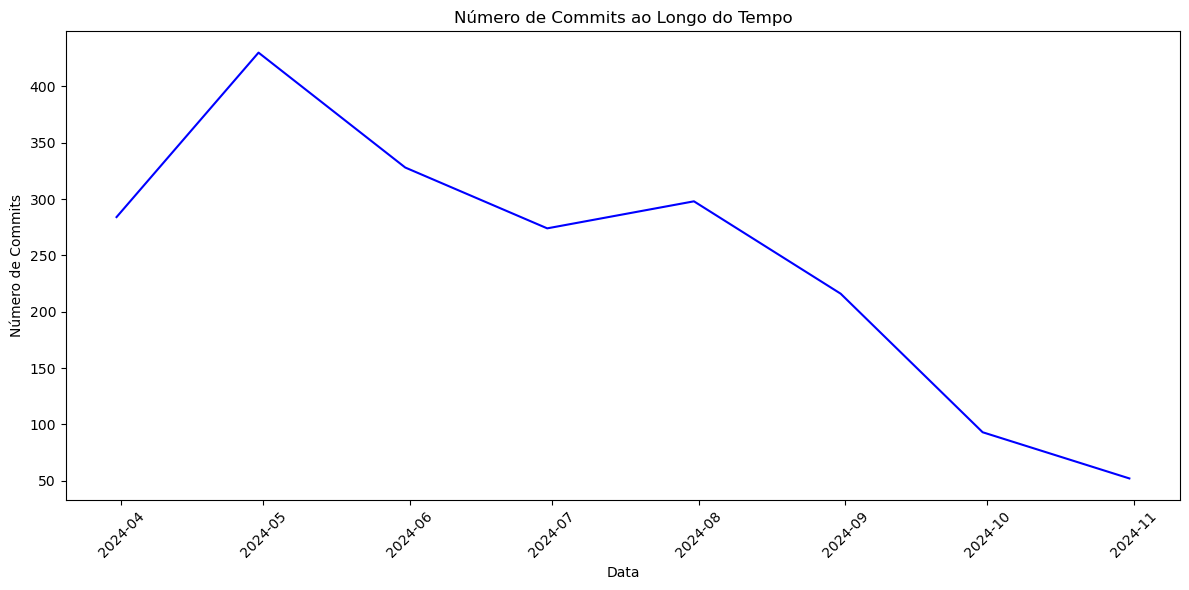

In [3]:
# Converter a coluna de data para datetime com timezone UTC
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)

# Remover linhas onde a conversão falhou (se houver)
df_commits = df_commits.dropna(subset=['author_date'])

# Definir a coluna de data como índice
df_commits.set_index('author_date', inplace=True)

# Agrupar por mês e contar o número de commits
monthly_pull_requests = df_commits.resample('M').size()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_pull_requests.index, y=monthly_pull_requests.values, marker='', color='blue')
plt.title('Número de Commits ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Commits')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


0 valores inválidos em 'author_date'


C:\Users\Adriano\AppData\Local\Temp\ipykernel_16536\1909926089.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_commits['year_month'] = df_commits['author_date'].dt.to_period('M')


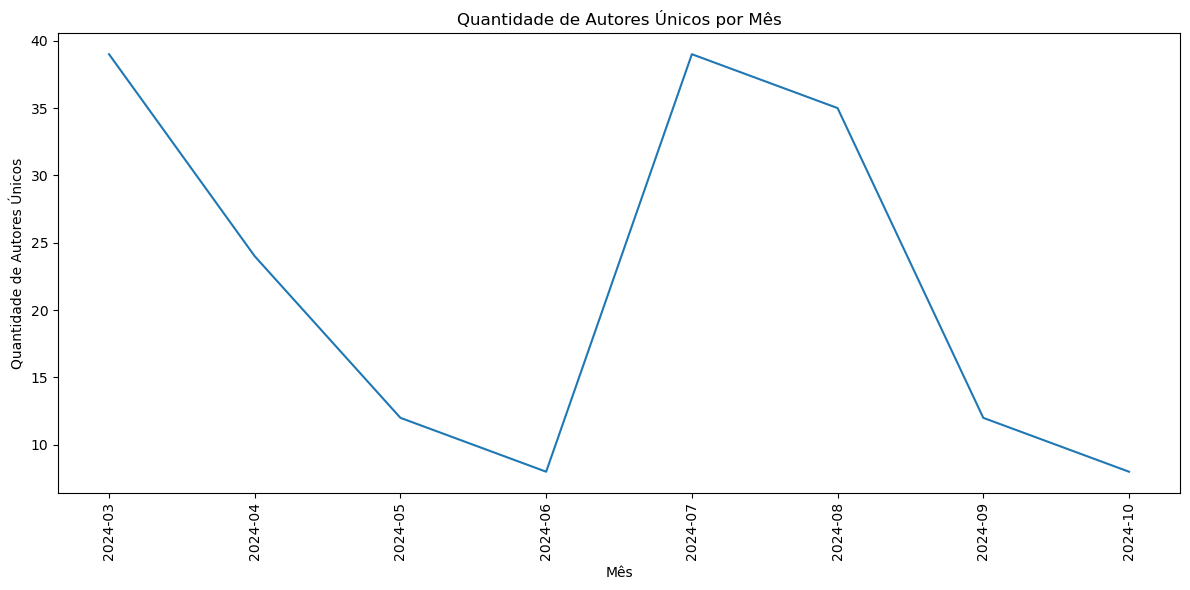

In [4]:
# Converter a coluna 'author_date' para datetime com fuso horário UTC
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)

# Verificar se há valores nulos após a conversão
print(df_commits['author_date'].isnull().sum(), "valores inválidos em 'author_date'")

# Remover linhas com valores inválidos (opcional)
df_commits = df_commits.dropna(subset=['author_date'])

# Extrair o ano e o mês da coluna 'author_date'
df_commits['year_month'] = df_commits['author_date'].dt.to_period('M')

# Contar o número de autores únicos por mês
authors_per_month = df_commits.groupby('year_month')['author_email'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_month.index.astype(str), authors_per_month.values, marker='', linestyle='-')
plt.title('Quantidade de Autores Únicos por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(rotation=90)  # Rotacionar para facilitar a leitura
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()

0 valores inválidos em 'committer_date'


C:\Users\Adriano\AppData\Local\Temp\ipykernel_16536\762567147.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_commits['year_month'] = df_commits['committer_date'].dt.to_period('M')


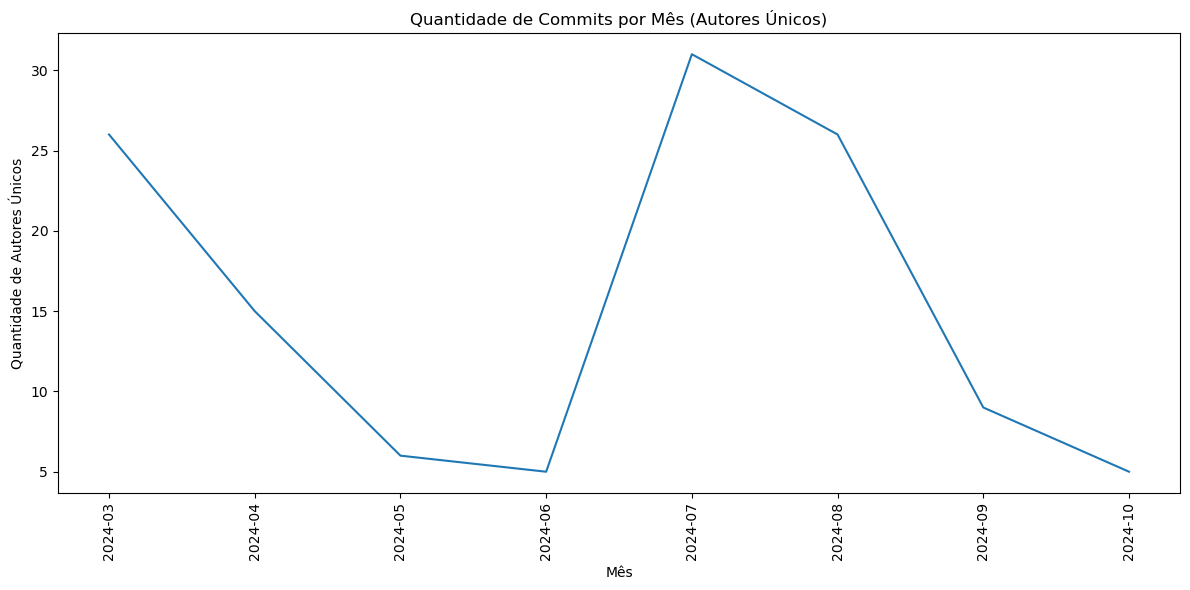

In [5]:
# Converter a coluna 'committer_date' para datetime com fuso horário UTC
df_commits['committer_date'] = pd.to_datetime(df_commits['committer_date'], errors='coerce', utc=True)

# Verificar se há valores nulos após a conversão
print(df_commits['committer_date'].isnull().sum(), "valores inválidos em 'committer_date'")

# Remover linhas com valores inválidos (opcional)
df_commits = df_commits.dropna(subset=['committer_date'])

# Extrair o ano e o mês da coluna 'committer_date'
df_commits['year_month'] = df_commits['committer_date'].dt.to_period('M')

# Contar o número de autores (committer_email) únicos por mês
authors_per_month = df_commits.groupby('year_month')['committer_email'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_month.index.astype(str), authors_per_month.values, marker='', linestyle='-')
plt.title('Quantidade de Commits por Mês (Autores Únicos)')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(rotation=90)  # Rotacionar as etiquetas dos meses para melhor visualização
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()